In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
Data = pd.merge(ride_data, city_data, how = "left")

# Display the data table for preview
Data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
Urban = Data[Data["type"] == "Urban"]
Sub = Data[Data["type"] == "Suburban"]
Rural = Data[Data["type"] == "Rural"]

Urban_rides = Urban.groupby(["city"]).count()["ride_id"]
Urban_fare = Urban.groupby(["city"]).mean()["fare"]
Urban_drivers = Urban.groupby(["city"]).mean()["driver_count"]

Sub_rides = Sub.groupby(["city"]).count()["ride_id"]
Sub_fare = Sub.groupby(["city"]).mean()["fare"]
Sub_drivers = Sub.groupby(["city"]).mean()["driver_count"]

Rural_rides = Rural.groupby(["city"]).count()["ride_id"]
Rural_fare = Rural.groupby(["city"]).mean()["fare"]
Rural_drivers = Rural.groupby(["city"]).mean()["driver_count"]

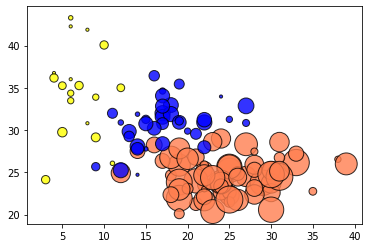

In [3]:
plt.scatter(Urban_rides,
           Urban_fare,
           s=10*Urban_drivers, c="coral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Urban")
plt.scatter(Sub_rides,
           Sub_fare,
           s=10*Sub_drivers, c="blue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Suburban")
plt.scatter(Rural_rides,
           Rural_fare,
           s=10*Rural_drivers, c="yellow",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")

## Total Fares by City Type

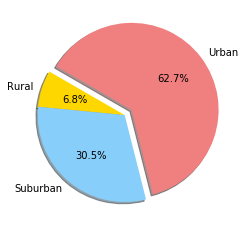

In [5]:
city_group=Data.groupby(["type"]).sum()["fare"]
city_group.sum()

fares_citytype=(city_group/city_group.sum())*100

plt.pie(fares_citytype,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.savefig("Fig1.png")

## Total Rides by City Type

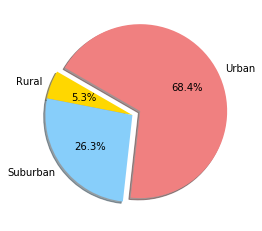

In [6]:
city_group=Data.groupby(["type"]).count()["ride_id"]
city_group.count()

rides_citytype=(city_group/city_group.sum())*100

plt.pie(rides_citytype,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.savefig("Fig2.png")

## Total Drivers by City Type

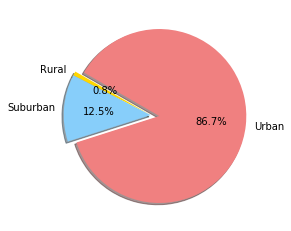

In [16]:
city_group=Data.groupby(["type"]).sum()["driver_count"]
city_group.sum()

drivers_citytype=(city_group/city_group.sum())*100

plt.pie(drivers_citytype,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.savefig("Fig3.png")